In [1]:
from helpers_loading import *
from helpers_submission import *
from helpers_visualization import *
from helpers_cnn import *

from CNNModel import *

import numpy as np

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
X, Y = load_training_set()

Maybe to be added : https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras

## Model training

In [22]:
filename = 'UNet16x16.h5'
model_constructor = construct_keras_model_unet
window_size = 16

previous_learning_rate = 0.001
#32 epochs

In [23]:
model = CNNModel(window_size=window_size, model_constructor=model_constructor)

#model.load(filename)

In [24]:
model.train(X, Y, epochs=200, batch_size=64, steps_per_epoch=50, image_augmentation=True, lr=previous_learning_rate)

Training set shape:  (100, 400, 400, 3)
Epoch 1/200
 9/50 [====>.........................] - ETA: 4:59 - loss: 1.5244 - acc: 0.6979
Training completed


In [9]:
#To save the model:
filename = 'Basic64x64.h5'

model.save(filename)

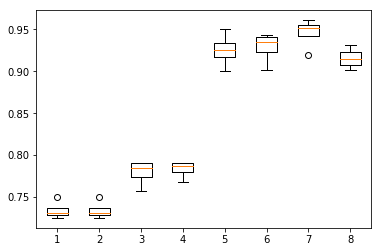

In [61]:
plt.boxplot([naive, logistic, svm, forest, conv4_not, conv4_augmented, conv6_augmented, unet])
plt.show()

In [36]:
naive = np.array([0.725, 0.73, 0.732, 0.75])
logistic = np.array([0.725, 0.73, 0.732, 0.75])
svm = np.array([0.78, 0.79, 0.757, 0.791])
forest = np.array([0.79, 0.783, 0.768, 0.790])
conv4_not = np.array([0.92795, 0.90, 0.95, 0.923])
conv4_augmented = np.array([0.94, 0.901, 0.93, 0.943])
conv6_augmented = np.array([0.95337, 0.92, 0.95, 0.961])
unet = np.array([0.93152, 0.92, 0.909, 0.902])

In [45]:
np.mean(naive)

0.73425000000000007

In [46]:
np.mean(logistic)

0.73425000000000007

In [47]:
np.mean(svm)

0.77949999999999997

In [48]:
np.mean(forest)

0.78275000000000006

In [49]:
np.mean(conv4_not)

0.92523749999999993

In [50]:
np.mean(conv4_augmented)

0.92849999999999999

In [51]:
np.mean(conv6_augmented)

0.94609249999999989

In [52]:
np.mean(unet)

0.91563000000000005

AAAAAA

In [37]:
2*np.std(naive)

0.018887826767524121

In [38]:
2*np.std(logistic)

0.018887826767524121

In [39]:
2*np.std(svm)

0.027367864366808044

In [40]:
2*np.std(forest)

0.0179652442232217

In [41]:
2*np.std(conv4_not)

0.0355313505935251

In [42]:
2*np.std(conv4_augmented)

0.033181320046074055

In [43]:
2*np.std(conv6_augmented)

0.031165408307930079

In [44]:
2*np.std(unet)

0.022390238944683012

# 2

In [27]:
model = CNNModel(window_size=64, model_constructor=construct_keras_model_4conv)
model.load('4Conv64x64.h5')

In [42]:
test_imgs = load_testing_set()

In [43]:
#test_imgs = test_imgs[:10]

In [44]:
#Costly operation
test_pred1 = model.predict(test_imgs[:25])

In [45]:
#Costy operation
test_pred2 = model.predict(test_imgs[25:])

In [46]:
test_pred = np.concatenate([test_pred1, test_pred2])

In [47]:
test_pred.shape

(50, 608, 608)

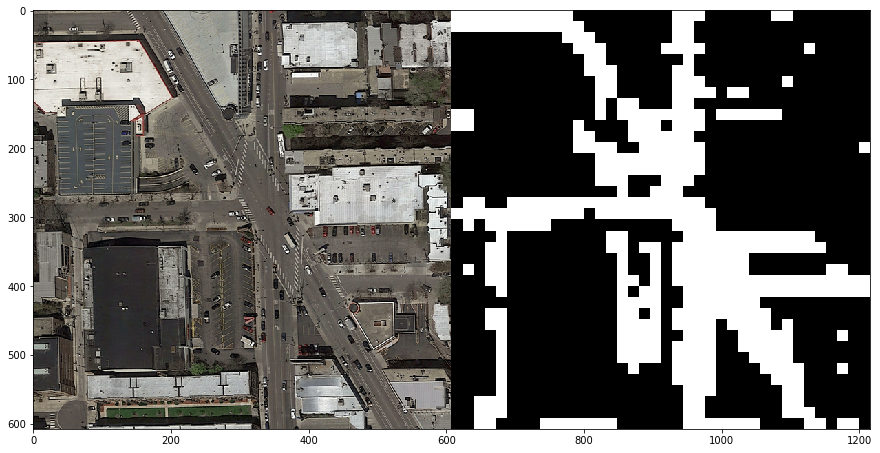

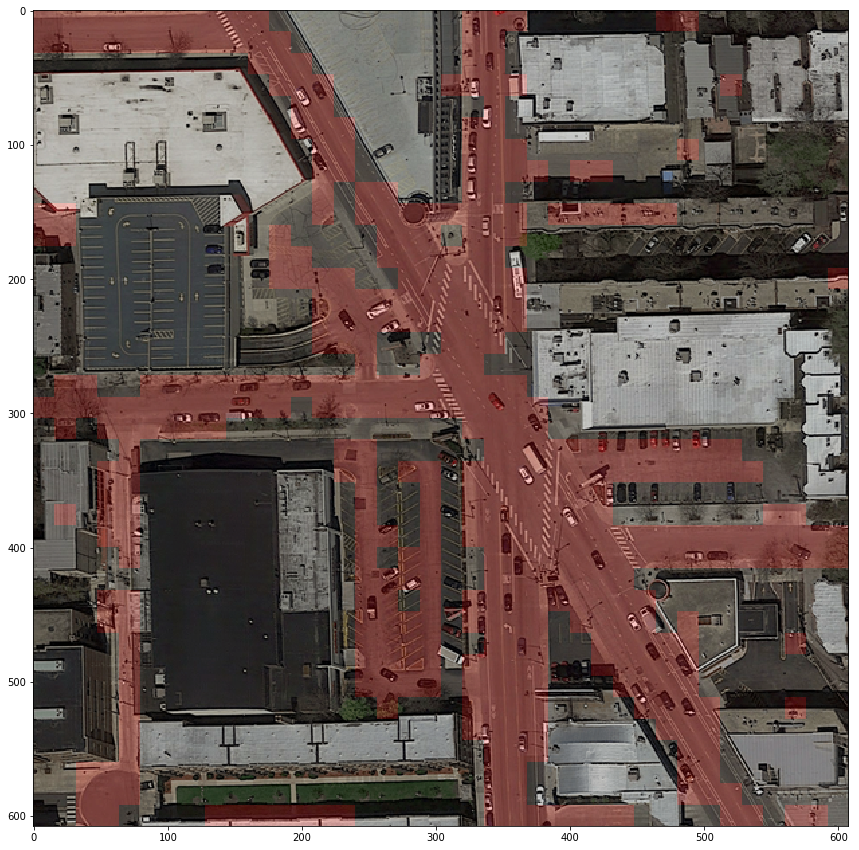

In [81]:
idx = 15

visualize_prediction(test_imgs[idx], test_pred[idx])

In [60]:
submission_filename = 'submission_4Conv64x64.csv'

make_submission(test_pred, submission_filename)